In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data=data.drop(columns=['name','id','host_name'])

In [4]:
data.shape

(48895, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [7]:
def bar_plot(variable):
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
   
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

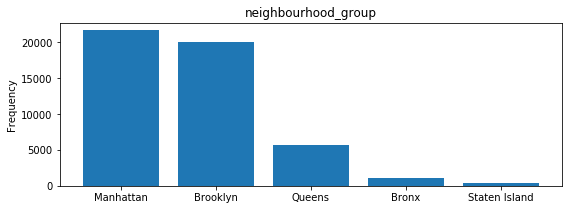

neighbourhood_group: 
 Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


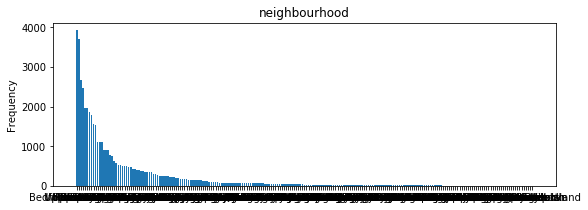

neighbourhood: 
 Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Fort Wadsworth           1
Rossville                1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64


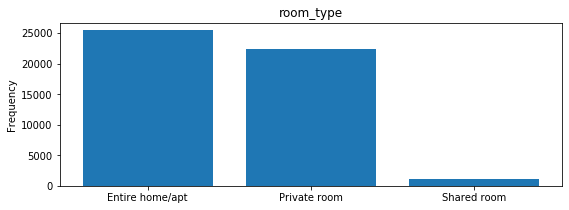

room_type: 
 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [8]:
category1 = ["neighbourhood_group","neighbourhood","room_type"]
for c in category1:
    bar_plot(c)

In [16]:
def plot_hist(variable):
    plt.figure(figsize =(9,3))
    plt.hist(data[variable], bins =15)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

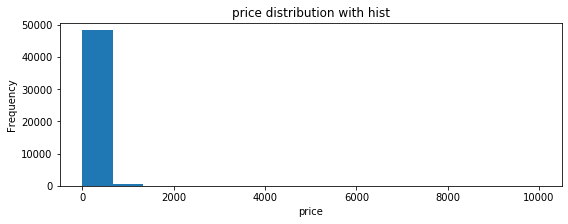

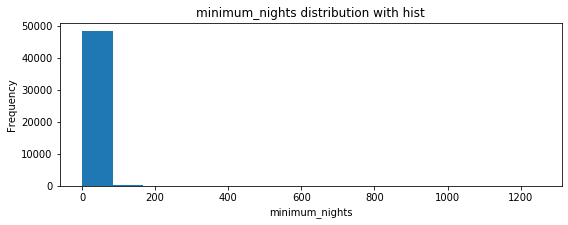

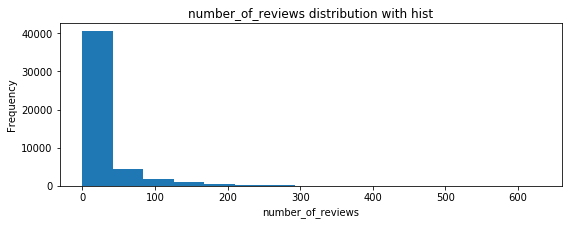

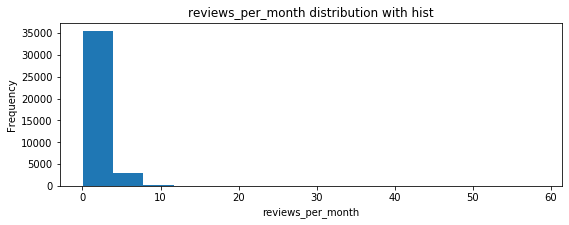

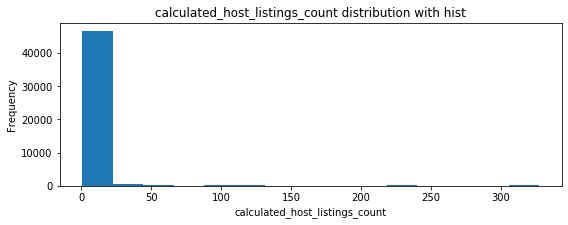

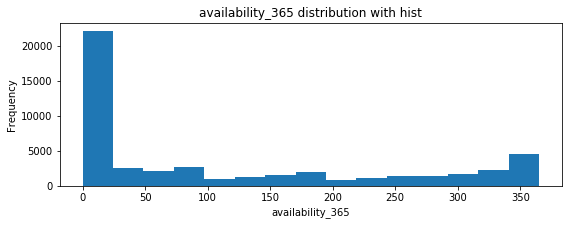

In [18]:
numericVar = ["price", "minimum_nights", "number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]
for n in numericVar:
    plot_hist(n)


In [19]:
data.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
data.reviews_per_month=data.reviews_per_month.fillna(data.reviews_per_month.mean())
data.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

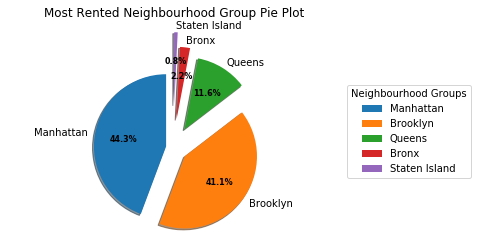

In [22]:
labels = data.neighbourhood_group.value_counts().index
sizes = data.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set(title="Most Rented Neighbourhood Group Pie Plot")
ax.legend(wedges, labels,
          title="Neighbourhood Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

In [23]:
for neighbourhood_group in data.neighbourhood_group.unique():
    neighbourhoods = data.neighbourhood[data.neighbourhood_group == neighbourhood_group].unique()
    print("{} has {} Neighbourhoods: {}...\n".format(
        neighbourhood_group, 
        len(neighbourhoods), 
        neighbourhoods[:5]
    ))

Brooklyn has 47 Neighbourhoods: ['Kensington' 'Clinton Hill' 'Bedford-Stuyvesant' 'South Slope'
 'Williamsburg']...

Manhattan has 32 Neighbourhoods: ['Midtown' 'Harlem' 'East Harlem' 'Murray Hill' "Hell's Kitchen"]...

Queens has 51 Neighbourhoods: ['Long Island City' 'Woodside' 'Flushing' 'Sunnyside' 'Ridgewood']...

Staten Island has 43 Neighbourhoods: ['St. George' 'Tompkinsville' 'Emerson Hill' 'Shore Acres' 'Arrochar']...

Bronx has 48 Neighbourhoods: ['Highbridge' 'Clason Point' 'Eastchester' 'Kingsbridge' 'Woodlawn']...



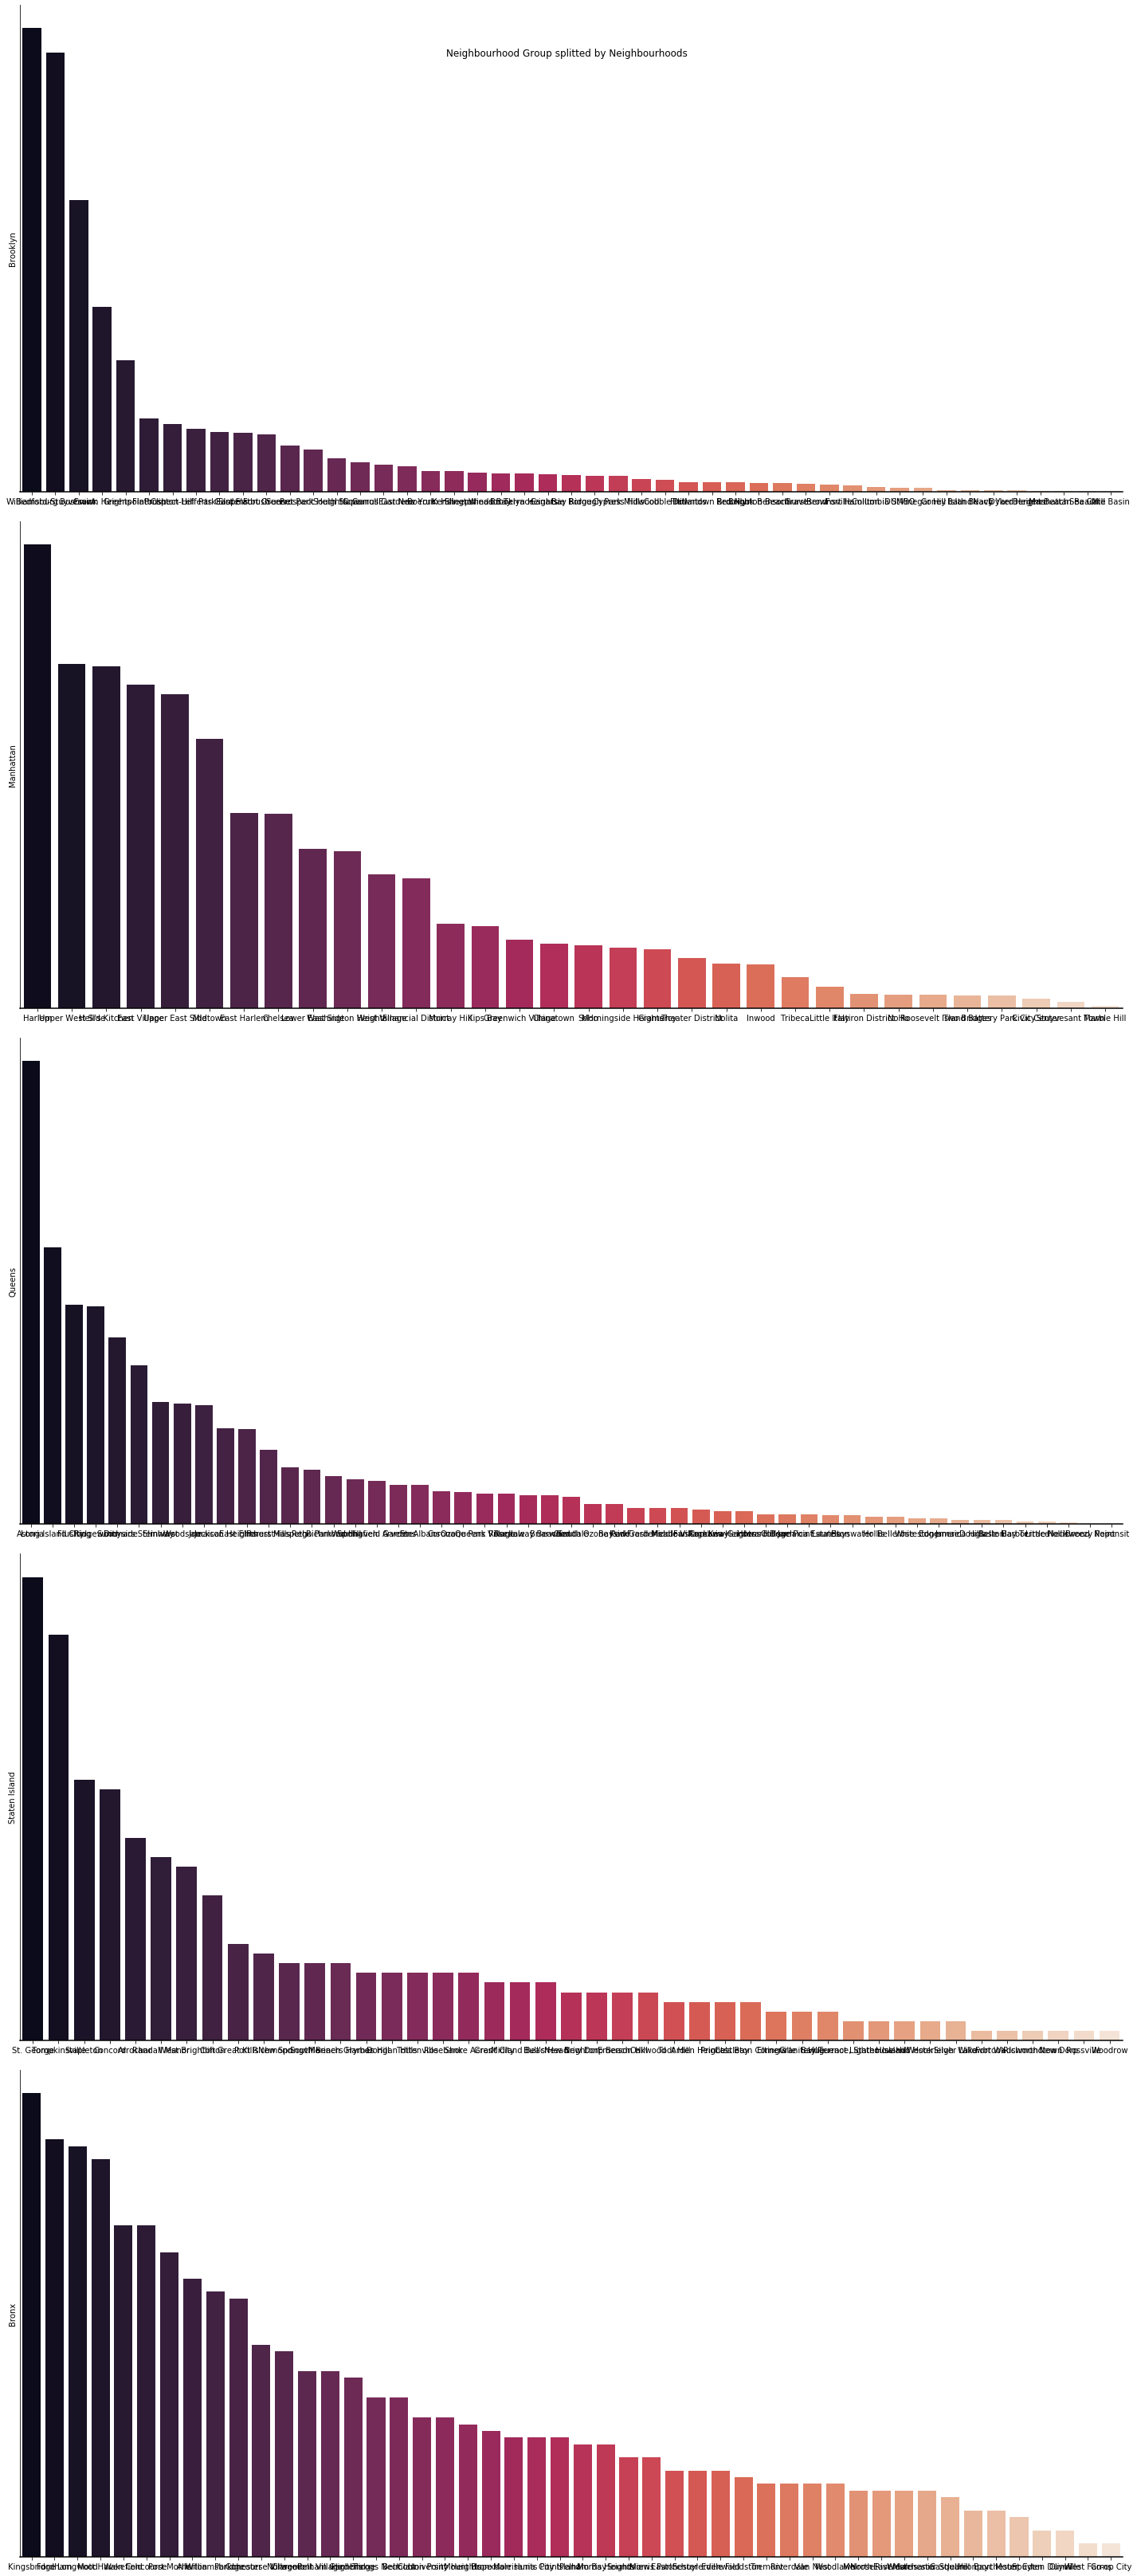

In [25]:
f, subplots = plt.subplots(len(data.neighbourhood_group.unique()), 1, figsize=(20, 45))

for i, neighbourhood_group in enumerate(data.neighbourhood_group.unique()):
    neighbourhoods = data.neighbourhood[data.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x, y=y, palette="rocket", ax=ax)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(neighbourhood_group)

# Finalize the plot
sns.despine(bottom=True)
f.suptitle('Neighbourhood Group splitted by Neighbourhoods ')
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

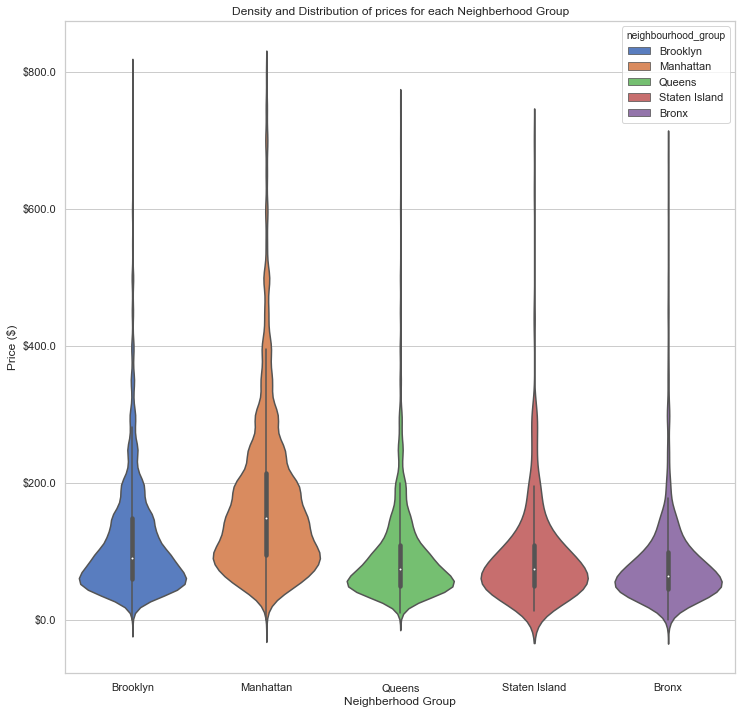

In [31]:
#Density and Distribution of Prices for each Neighbourhood Group
sns.set(style="whitegrid")
# Parameters
FILTER_PRICE_VALUE = 800

# Filter data prices for shake of the visualization
sub_data_price = data[data.price < FILTER_PRICE_VALUE]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=sub_data_price, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price ($)', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

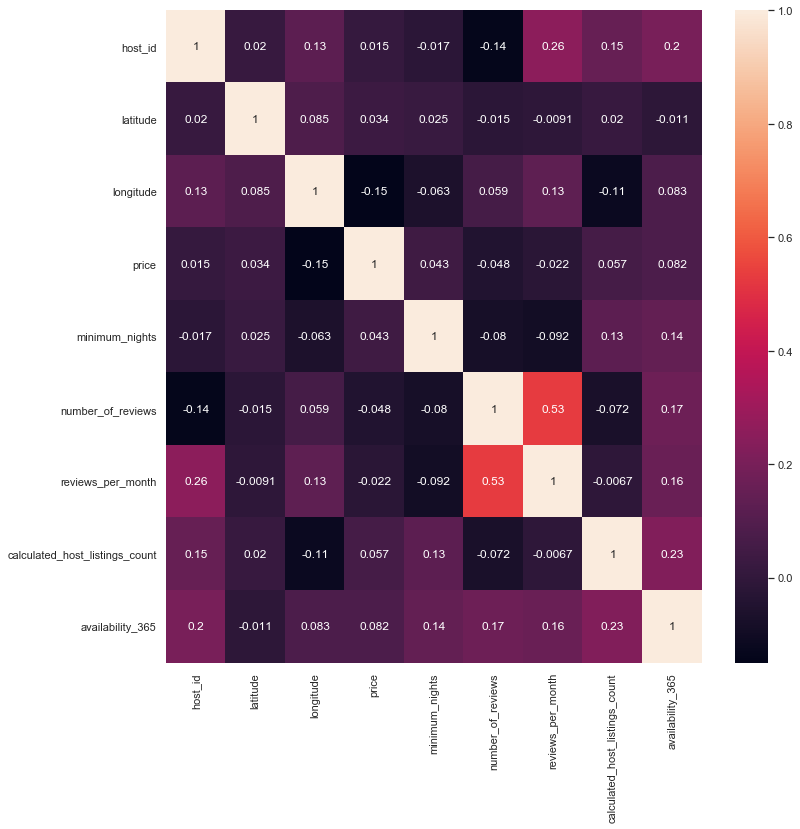

In [32]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(data.corr(),annot=True)

In [33]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [34]:
airbnb=pd.read_csv('AB_NYC_2019.csv')

airbnb.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
airbnb['reviews_per_month']=airbnb['reviews_per_month'].replace(np.nan, 0)

In [35]:
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

In [36]:
list(le.inverse_transform(airbnb['room_type']))[:10]

['Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Shared room']

In [37]:
lm = LinearRegression()

X = airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.7340965693626
        R2 Score: 11.63957678232357
        Mean Absolute Error: 72.86091366825617
     


In [39]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.69168299661376
        R2 Score: 16.50124339053506
        Mean Absolute Error: 63.96746545597771
     


In [41]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,135.112125
1,140,210.599057
2,195,176.222978
3,120,100.439183
4,88,88.545753
